# Introduction to Data Analysis - Lesson 3
## Numpy and Pandas for 2d Data

In [1]:
import numpy as np

### Numpy 2d Arrays

In [2]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [3]:
# Accessing elements
if True:
    print ridership[1, 3] # 2328
    print ridership[1:3, 3:5] 
    print ridership[1, :]  

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [4]:
# Vectorized operations on rows or columns
if True:
    print ridership[0, :] + ridership[1, :]
    print ridership[:, 0] + ridership[:, 1]

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [5]:
# Vectorized operations on entire arrays
if True:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print a + b

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [6]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    
    max_station = ridership[0, :].argmax()
    overall_mean = ridership.mean()
    mean_for_max = ridership[: , max_station].mean()
    
    return (overall_mean, mean_for_max)

In [7]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

### Numpy Axis

In [8]:
# NumPy axis argument
if True:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print a.sum() # 45
    print a.sum(axis=0) # 12, 15, 18
    print a.sum(axis=1) # 6, 15, 24

45
[12 15 18]
[ 6 15 24]


In [9]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [10]:
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    station_means = ridership.mean(axis = 0)
    max_daily_ridership = station_means.max()
    min_daily_ridership = station_means.min()
    
    return (max_daily_ridership, min_daily_ridership)

In [11]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

### Accessing Elements Of A DataFrame

In [12]:
import pandas as pd

In [13]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [14]:
# DataFrame creation
if True:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df_1

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print df_2

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [15]:
# Accessing elements
if True:
    print ridership_df.iloc[0] # 0,    0,    2,    5,    0
    print ridership_df.loc['05-05-11'] # 1608, 4802, 3932, 4477, 2705
    print ridership_df['R003']
    print ridership_df.iloc[1, 3] # 2328

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [16]:
# Accessing multiple rows
if True:
    print ridership_df.iloc[1:4]

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [17]:
# Accessing multiple columns
if True:
    print ridership_df[['R003', 'R005']]

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [18]:
# Pandas axis
if True:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print df.sum() # 3, 12
    print df.sum(axis=1) # 3, 5, 7
    print df.values.sum() # 15

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [19]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_station = ridership.iloc[0].argmax()
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[max_station].mean()
    
    return (overall_mean, mean_for_max)

In [20]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

### Calculating Correlation

In [21]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [22]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    # get standard units manually and then the correllation
    #     x_std = (x - x.mean()) / x.std(ddof = 0)
    #     y_std = (y - y.mean()) / y.std(ddof = 0)
    #     (x_std * y_std).mean()
    
    return x.corr(y)

In [23]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

In [24]:
print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

0.0356485157722
-0.0266933483216
-0.229034323408


In [25]:
print correlation(entries, cum_entries)

0.585895470766


### DataFrame Vectorized Operations

In [26]:
# Adding DataFrames with the column names
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print df1 + df2

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [27]:
# Adding DataFrames with overlapping column names 
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print df1 + df2

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [28]:
# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print df1 + df2

         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [29]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [30]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift()

In [31]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### DataFrame Applymap()

In [32]:
# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print df.applymap(add_one)

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [33]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [34]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [35]:
def get_letter_grade(grade):
    if 90 <= grade <= 100:
        return 'A'
    elif 80 <= grade <= 89:
        return 'B'
    elif 70 <= grade <= 79:
        return 'C'
    elif 60 <= grade <= 69:
        return 'D'
    else:
        return 'F'

In [36]:
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(get_letter_grade)

In [37]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### DataFrame Apply()

In [38]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [39]:
# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [40]:
def standardize_single(series):
    return (series - series.mean()) / series.std(ddof = 0)

In [41]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_single)

In [42]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### DataFrame apply() Use Case 2

In [43]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [44]:
# DataFrame apply() - use case 2
if True:   
    print df.apply(np.mean)
    print df.apply(np.max)

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [45]:
def get_second_largest(series):
    sorted_series = series.sort_values(ascending = False)
            
    return sorted_series.iloc[1]

In [46]:
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(get_second_largest)

In [47]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

### Adding a DataFrame to a Series

In [48]:
# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [49]:
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [50]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [51]:
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [52]:
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### Standardizing Each Column Again

In [53]:
# Adding using +
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [54]:
# Adding with axis='index'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='index')
    # The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [55]:
# Adding with axis='columns'
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [56]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [57]:
# standardize a value
# x_std = (x - x.mean()) / x.std(ddof = 0)

In [58]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean()) / df.std(ddof=0)

In [59]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [60]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    mean_diffs = df.subtract(df.mean(axis = "columns"), axis = 'index')
    return mean_diffs.div(df.std(axis = 'columns'), axis = 'index')

In [61]:
standardize_rows(grades_df)

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


### Pandas groupby()

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [64]:
# Examine DataFrame
if True:
    print example_df

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [65]:
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [66]:
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [67]:
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [68]:
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


In [69]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [70]:
### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
subway_df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [71]:
cols = ['UNIT', 'station', 'DATEn', 'day_week', 'ENTRIESn_hourly', 'EXITSn_hourly']
riders_by_day = subway_df[cols]

riders_by_day

,UNIT,station,DATEn,day_week,ENTRIESn_hourly,EXITSn_hourly
0,R003,CYPRESS HILLS,05-01-11,6,0.0,0.0
1,R003,CYPRESS HILLS,05-01-11,6,0.0,0.0
2,R003,CYPRESS HILLS,05-01-11,6,0.0,0.0
3,R003,CYPRESS HILLS,05-01-11,6,0.0,0.0
4,R003,CYPRESS HILLS,05-01-11,6,0.0,0.0
5,R003,CYPRESS HILLS,05-02-11,0,15.0,34.0
6,R003,CYPRESS HILLS,05-02-11,0,19.0,40.0
7,R003,CYPRESS HILLS,05-02-11,0,488.0,118.0
8,R003,CYPRESS HILLS,05-02-11,0,490.0,132.0
9,R003,CYPRESS HILLS,05-02-11,0,231.0,232.0


In [72]:
grouped = riders_by_day.groupby(['UNIT', 'day_week'])
grouped.mean()

ENTRIESn_hourly  EXITSn_hourly
UNIT day_week                                
R003 0              220.966667     146.233333
     1              268.535714     179.750000
     2              285.450000     190.000000
     3              320.136364     227.909091
     4              279.818182     192.454545
     5              125.500000     115.150000
     6               73.307692      61.269231
R004 0              545.566667     368.033333
     1              688.466667     528.266667
     2              729.476190     544.666667
     3              728.434783     520.695652
     4              688.739130     531.695652
     5              344.142857     324.047619
     6              179.296296     160.222222
R005 0              591.571429     425.178571
     1              675.103448     502.620690
     2              706.954545     547.045455
     3              706.045455     534.590909
     4              697.909091     528.590909
     5              347.000000     353.500000
     6              183.896552     176.793103
R006 0              633.964286     383.071429
     1              920.851852     675.259259
     2              797.521739     541.869565
     3              808.250000     563.500000
     4              797.250000     552.375000
     5              354.166667     288.125000
     6              205.300000     160.900000
R007 0              393.357143     277.321429
     1              495.678571     380.142857
...                        ...            ...
R454 5              160.900000     711.050000
     6              106.880000     512.200000
R455 0              150.481481     426.259259
     1              155.896552     495.724138
     2              167.454545     517.545455
     3              178.500000     558.400000
     4              176.476190     534.428571
     5              113.608696     368.565217
     6               97.576923     322.269231
R456 0              326.655172     701.448276
     1              334.800000     748.700000
     2              349.708333     700.583333
     3              393.409091     853.909091
     4              385.041667     758.750000
     5              135.500000     430.791667
     6              128.208333     404.833333
R459 0              281.800000       7.333333
     1               15.000000       1.944444
     2                0.000000       0.166667
     3                0.000000       0.181818
     4                0.111111       0.444444
     5               77.636364       9.454545
     6              183.916667       4.333333
R464 0                0.000000       0.000000
     1                0.000000       0.000000
     2                0.000000       0.000000
     3                0.000000       0.000000
     4                0.000000       0.000000
     5                0.000000       0.000000
     6                0.000000       0.000000

[1680 rows x 2 columns]

### Calculating Hourly Entries and Exits

In [73]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift()

In [74]:
grouped_entries_exits = grouped[['ENTRIESn_hourly', 'EXITSn_hourly']].apply(get_hourly_entries_and_exits)

In [75]:
grouped_entries_exits

,ENTRIESn_hourly,EXITSn_hourly
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,NaN,NaN
6,4.0,6.0
7,469.0,78.0
8,2.0,14.0
9,-259.0,100.0


In [76]:
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [77]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift()

In [78]:
grouped_ridership = ridership_df.groupby('UNIT')
grouped_ridership[['ENTRIESn', 'EXITSn']].apply(get_hourly_entries_and_exits).reset_index()

,index,ENTRIESn,EXITSn
0,0,NaN,NaN
1,1,NaN,NaN
2,2,23.0,8.0
3,3,14.0,8.0
4,4,18.0,18.0
5,5,29.0,205.0
6,6,71.0,54.0
7,7,132.0,593.0
8,8,170.0,44.0


### Combining Pandas DataFrames

In [79]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [80]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [81]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on = ['DATEn', 'hour', 'latitude', 'longitude'], how = 'inner')

In [82]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


### Plotting for DataFrames

In [83]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [84]:
# groupby() without as_index
if True:
    first_even = example_df.groupby('even').first()
    print first_even
    print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame

      above_three  value
even                    
False       False      1
True        False      2


KeyError: 'even'

In [85]:
# groupby() with as_index=False
if True:
    print example_df.groupby('even', as_index=False).first()
    print example_df['even'] # Now 'even' is still a column in the DataFrame

    even above_three  value
0  False       False      1
1   True       False      2
a    False
b    False
c     True
d     True
e    False
f     True
g     True
Name: even, dtype: bool


In [86]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [113]:
## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

ridership_rain = subway_df.groupby(['day_week'])

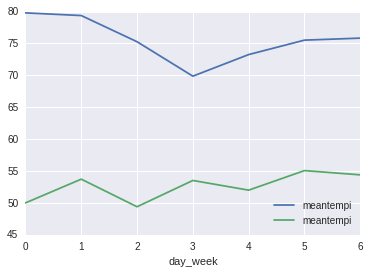

In [126]:
ridership_rain['meantempi'].max().plot(kind = 'line', legend = True)
ridership_rain['meantempi'].min().plot(kind = 'line', legend = True)

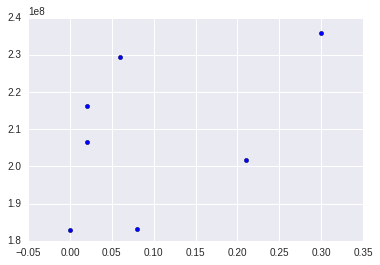

In [129]:
plt.scatter(ridership_rain.precipi.max(), ridership_rain.ENTRIESn.max())